In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

12227
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.measurement as mse
import pylib.mix as mix
import pylib.qucf_tests as qucf_tests

path_gl_ = "../QuCF/tests/"

In [4]:
# ---------------------------------------------------------------
# --- Test: basic gates ---
# ---------------------------------------------------------------
mix.reload_module(qucf_tests)

oo_tests = qucf_tests.TESTS__(False)
oo_tests.run_basic_tests()
oo_tests.run_arithmetic_tests()

# # ----------------------------------------------------------------
# # --- this is given here for future references ---
# def calc_gaussian_parameters(N, x_center):
#     x_left  = -1.0 - x_center
#     x_right = 1.0 - x_center
#     alpha_0 = x_left
#     alpha = 1.*N*(x_right - alpha_0)/(2.*(N-1))
#     return alpha_0, alpha
# x_center_gauss = -0.33
# Nx = 1 << 6
# alpha_0, alpha = calc_gaussian_parameters(Nx, x_center_gauss)
# # ----------------------------------------------------------------
oo_tests.run_sin_test()

Testing X gate:... PASSED PASSED PASSED 
Testing Y gate:... PASSED PASSED PASSED 
Testing Z gate:... PASSED PASSED PASSED PASSED 
Testing H gate:... PASSED PASSED PASSED 
Testing SWAP gate:... PASSED PASSED PASSED 
Testing Rx gate:... PASSED PASSED PASSED 
Testing Ry gate:... PASSED PASSED PASSED 
Testing Rz gate:... PASSED PASSED PASSED 
Testing Rc gate:... PASSED PASSED PASSED 
Testing incrementor:... PASSED PASSED PASSED 
Testing decrementor:... PASSED PASSED PASSED 
Testing AdderFixed:... PASSED PASSED PASSED PASSED 
Testing SubtractorFixed:... PASSED PASSED PASSED 
Testing ComparatorFixed:... PASSED PASSED PASSED PASSED 
Testing the SIN gate:... PASSED 

In [5]:
# ---------------------------------------------------------------
# --- Test: arithmetic gates ---
# ---------------------------------------------------------------
mix.reload_module(qucf_tests)

oo_tests = qucf_tests.TESTS__(False)
oo_tests.run_arithmetic_tests()

Testing incrementor:... PASSED PASSED PASSED 
Testing decrementor:... PASSED PASSED PASSED 
Testing AdderFixed:... PASSED PASSED PASSED PASSED 
Testing SubtractorFixed:... PASSED PASSED PASSED 
Testing ComparatorFixed:... PASSED PASSED PASSED PASSED 


In [6]:
# -----------------------------------------
# --- Test: large circuits ---
# -----------------------------------------
mix.reload_module(qucf_tests)

oo_tests = qucf_tests.TESTS__(False)
oo_tests.run_large_circuit_tests()

Testing a circuit with 28 qubits:... PASSED 


In [12]:
# ------------------------------------------------------------
# --- Test: construction of a Gauss function by using QSVT ---
# ------------------------------------------------------------
mix.reload_module(qucf_tests)

oo_tests = qucf_tests.TESTS__(False)
oo_tests.set_precision(1e-13)
out_za = oo_tests.run_qsvt_tests()

Testing QSVT: Gaussian function:... 
Read the project:  gauss
from the folder:  ../QuCF/tests/qsvt-gauss

--- QSVT: gauss
mu: 0.250
PASSED 

Testing QSVT: Gaussian function:... 
Read the project:  AE
from the folder:  ../QuCF/tests/amplitude-estimation

--- QSVT: gauss
mu: 0.250

classical integration: 1.649e-03
   vs   
AE integration: 1.773e-03

ny: 6
analytical error (with 0.81 probability): 5.090e-04

-------------------------------------------------------------------------------
The test is passed if
the absolute difference between the classical and AE integration
is less than the analytical error.
-------------------------------------------------------------------------------
PASSED 

<IPython.core.display.Javascript object>


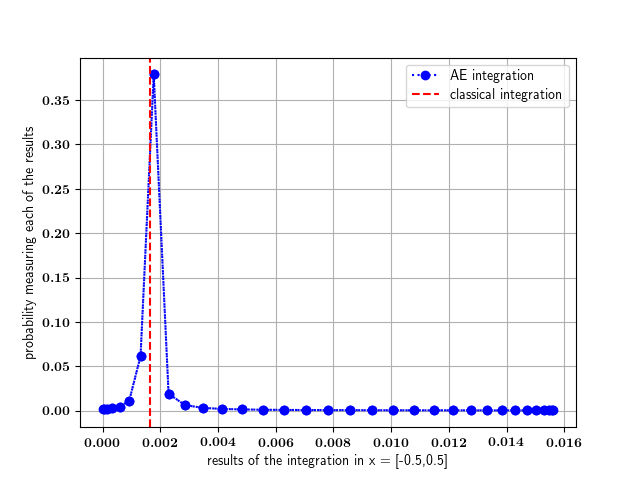

In [13]:
# ------------------------------------------------------
# --- Test: amplitude estimation ---
# ------------------------------------------------------
mix.reload_module(qucf_tests)

oo_tests = qucf_tests.TESTS__(False)
oo_tests.set_precision(1e-13)
oo_tests.test_AE_qsvt_gauss()

Testing Quantum Fourier Transform:... 
Read the project:  fourier
from the folder:  ../QuCF/tests/quantum-fourier

--- QSVT: gauss
mu: 0.250
Max diff. between the classical and quantum Fourier: 1.760e-14
PASSED 

<IPython.core.display.Javascript object>


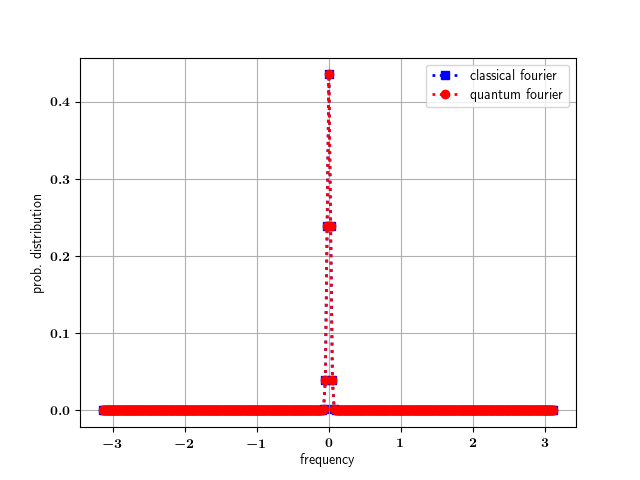

In [14]:
# ------------------------------------------------------
# --- Test: quantum fourier ---
# ------------------------------------------------------
mix.reload_module(qucf_tests)

oo_tests = qucf_tests.TESTS__(False)
oo_tests.set_precision(1e-13)
oo_tests.test_quantum_fourier()

In [60]:
reg_inp_states

{'y': [array([0]), array([0]), array([1])],
 'w': [array([0]), array([3]), array([3])],
 'x': [array([0]), array([0]), array([0])]}

In [40]:
reg_inp_states

{'y': [], 'w': [], 'x': []}

In [34]:
id_input_state = 0

input_state = oor.init_states_[id_input_state]["state"]
state_superposition_out = oor.output_all_states_[id_input_state]["state"]
ampl_out  = oor.output_all_states_[id_input_state]["ampls"]
print(input_state)
print(state_out)

[[0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 1 1 0 0 0]]


In [35]:
oor.output_all_states_

[{'state': array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int16),
  'ampls': array([(1., 0.)], dtype=[('real', '<f8'), ('imag', '<f8')])},
 {'state': array([[0, 0, 0, 1, 1, 1, 0, 0, 0]], dtype=int16),
  'ampls': array([(1., 0.)], dtype=[('real', '<f8'), ('imag', '<f8')])},
 {'state': array([[0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int16),
  'ampls': array([(1., 0.)], dtype=[('real', '<f8'), ('imag', '<f8')])}]

In [36]:
oor.init_states_

[{'state': array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int16),
  'ampls': array([(1., 0.)], dtype=[('real', '<f8'), ('imag', '<f8')])},
 {'state': array([[0, 0, 0, 0, 1, 1, 0, 0, 0]], dtype=int16),
  'ampls': array([(1., 0.)], dtype=[('real', '<f8'), ('imag', '<f8')])},
 {'state': array([[0, 0, 0, 1, 1, 1, 0, 0, 0]], dtype=int16),
  'ampls': array([(1., 0.)], dtype=[('real', '<f8'), ('imag', '<f8')])}]

In [12]:
class YY__:
    x = None
    __y = None
    
    def __init__(self):
        self.x = 10
        self.__y = 20
        return
    
    def set_y(self):
        self.__set_y()
        self.__y += 10
        return
        
    def __set_y(self):
        self.__y= 100
        return
    
    def print_y(self):
        print(self.__y)
        
    
    
oo_yy = YY__()

print(oo_yy.x)
oo_yy.print_y()
print(oo_yy._YY____y)

oo_yy.set_y()
print()
oo_yy.print_y()
    
    

10
20
20

110


In [12]:
rr = np.zeros(28); rr.fill(1)
res_int = mix.find_int_from_bit_array(rr)
print(rr)
print(res_int)

print()
rr_work = np.array(rr)
rr_work[-1] = 0
rr_work[-2] = 0
rr_work[0] = 0
res_int = mix.find_int_from_bit_array(rr_work)
print(rr_work)
print(res_int)

print()
rr_work = np.array(rr)
rr_work[-2] = 0
rr_work[0] = 0
res_int = mix.find_int_from_bit_array(rr_work)
print(rr_work)
print(res_int)

print()
rr_work = np.array(rr)
rr_work[-1] = 0
rr_work[-2] = 0
res_int = mix.find_int_from_bit_array(rr_work)
print(rr_work)
print(res_int)

print()
rr_work = np.array(rr)
rr_work[-2] = 0
res_int = mix.find_int_from_bit_array(rr_work)
print(rr_work)
print(res_int)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
268435455

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0.]
134217724

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1.]
134217725

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0.]
268435452

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1.]
268435453


In [28]:
xx = np.array([1,1,1,1])
yy = np.array([1,1,1,1])

if np.all(xx == yy):
    print("equal")
else:
    print("different")

equal
